### <span style="color:rgb(1,139,154)">Machine learning et Deep Learning</span>

### <span style="color:rgb(1,139,154)">M2: SDACS</span>


# <span style="color:rgb(1,139,154)"> Mini-Projet</span>


Elève Master: Ajili Houssem


In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

os.environ["OMP_NUM_THREADS"] = "1"

## Data Cleaning

In [117]:
df = pd.read_csv("iris.csv")

In [118]:
df.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [119]:
df.describe

<bound method NDFrame.describe of      sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]>

In [120]:
df.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

In [121]:
df.isnull().sum().sum()

0

In [122]:
df.isna().sum().sum()

0

In [123]:
df.duplicated().sum()

1

In [124]:
df1=df.drop_duplicates() 

In [125]:
df1.describe

<bound method NDFrame.describe of      sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[149 rows x 5 columns]>

In [126]:
count=pd.Series(df1['variety']).value_counts()
count

Setosa        50
Versicolor    50
Virginica     49
Name: variety, dtype: int64

In [127]:
df1=pd.get_dummies(df1, columns=['variety'])

In [128]:
df1.shape

(149, 7)

In [129]:
df1.info

<bound method DataFrame.info of      sepal.length  sepal.width  petal.length  petal.width  variety_Setosa  \
0             5.1          3.5           1.4          0.2               1   
1             4.9          3.0           1.4          0.2               1   
2             4.7          3.2           1.3          0.2               1   
3             4.6          3.1           1.5          0.2               1   
4             5.0          3.6           1.4          0.2               1   
..            ...          ...           ...          ...             ...   
145           6.7          3.0           5.2          2.3               0   
146           6.3          2.5           5.0          1.9               0   
147           6.5          3.0           5.2          2.0               0   
148           6.2          3.4           5.4          2.3               0   
149           5.9          3.0           5.1          1.8               0   

     variety_Versicolor  variety_Virginica 

In [130]:
iris=df.columns.to_list
iris

<bound method IndexOpsMixin.tolist of Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')>

In [131]:
correlations = df1.corr()

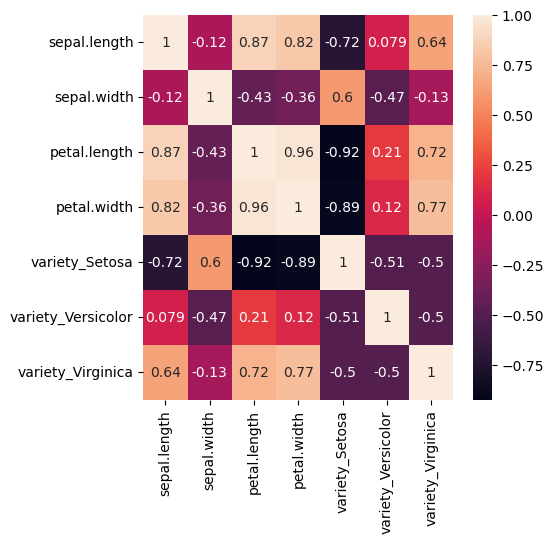

In [132]:
plt.figure(figsize=(5,5))
sns.heatmap(correlations, annot = True)
plt.show()

<Axes: >

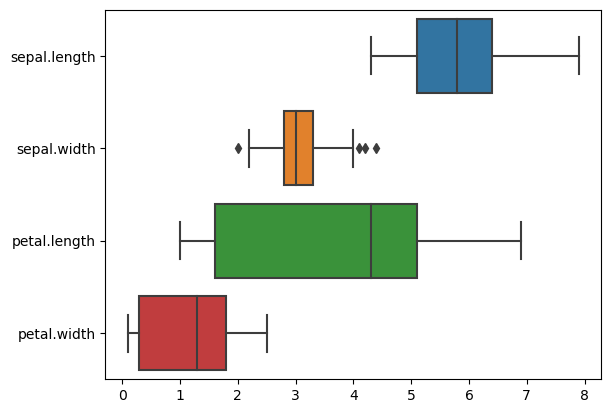

In [133]:
sns.boxplot(data = df1[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']], orient = 'h')

In [134]:
#On supprime les valeurs aberrantes

#On calcule Q1

q1=df1["sepal.width"].quantile(q=0.25)

#On calcule Q3

q3=df1["sepal.width"].quantile(q=0.75)

#On calcule l'écart interquartile (IQR)

IQR=q3-q1

#On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile

borne_inf = q1-1.5*IQR

#On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile

borne_sup = q3 +1.5*IQR

#On garde les valeurs à l'intérieur de la borne inférieure et supérieure

df1= df1[df1["sepal.width"]<borne_sup]
df1=df1[df1["sepal.width"]>borne_inf]

<Axes: >

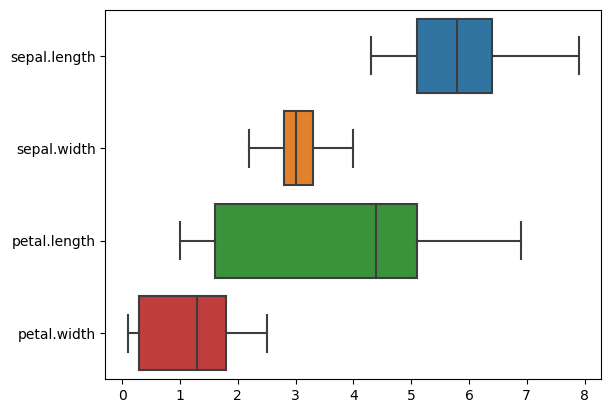

In [135]:
sns.boxplot(data = df1[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']], orient = 'h')

Supprimer la colonne 'variety' pour pouvoir faire un pca correcte

In [136]:
df2=df1
df2.drop(['variety_Setosa','variety_Versicolor','variety_Virginica'],axis=1,inplace=True)
df2.info

<bound method DataFrame.info of      sepal.length  sepal.width  petal.length  petal.width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[145 rows x 4 columns]>

## Data preprocessing 

## PCA

In [137]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [138]:
X_scaler= scaler.fit_transform(df2)

In [139]:
np.shape(X_scaler)
df2.shape

(145, 4)

In [140]:
pca=PCA(n_components=3)
X_pca=pca.fit_transform(X_scaler)

In [141]:
X_pca.shape

(145, 3)

In [142]:
#inertie d'information somme des valeurs propres
print(pca.explained_variance_ratio_)  

[0.72838484 0.22885847 0.03747283]


In [143]:
pca.explained_variance_ratio_.sum()

0.9947161398777884

# Visualisation PCA

In [144]:
X=df2.values

In [145]:
df['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [146]:
labels = df['variety']

Comparaison de la disturbution de la jeu de données avant et aprés PCA

## 3D

In [147]:
from mpl_toolkits import mplot3d

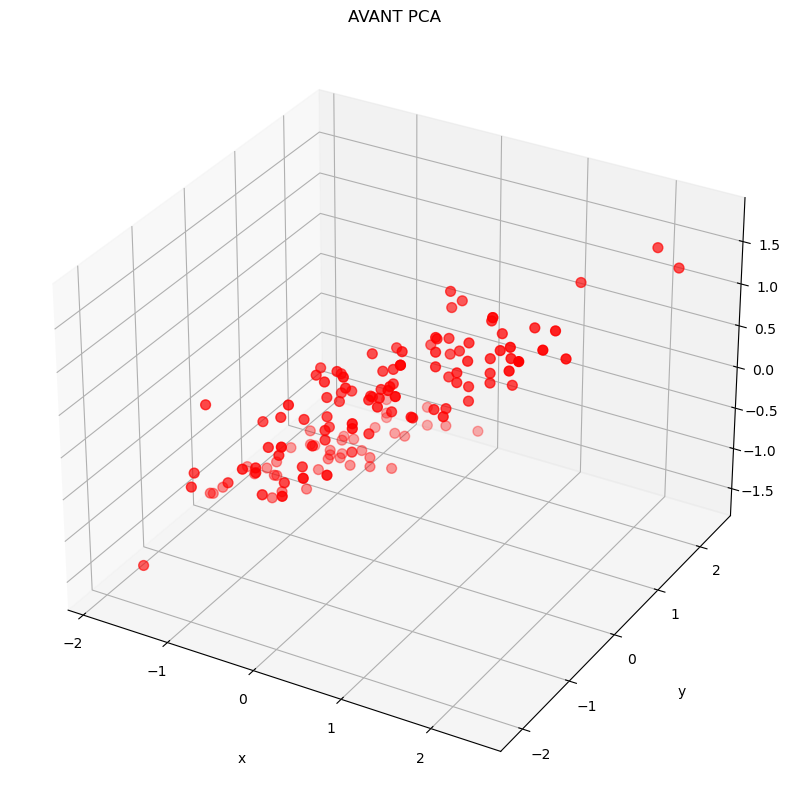

In [148]:
x = X_scaler[:,0]
y = X_scaler[:,1]
z = X_scaler[:,2]

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(x, y, z, c = 'r', s = 50)
ax.set_title('AVANT PCA')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()

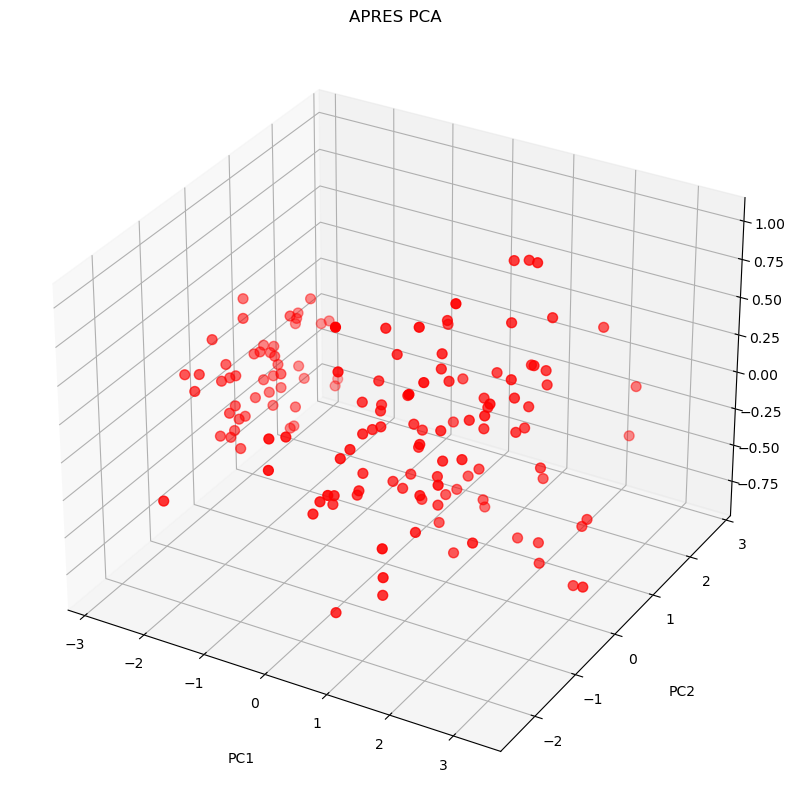

In [149]:
x = X_pca[:,0]
y = X_pca[:,1]
z = X_pca[:,2]

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()
ax.scatter(x, y, z, c = 'r', s = 50)
ax.set_title('APRES PCA')
# Set axes label
ax.set_xlabel('PC1', labelpad=20)
ax.set_ylabel('PC2', labelpad=20)
ax.set_zlabel('PC3', labelpad=20)

plt.show()

## 2D

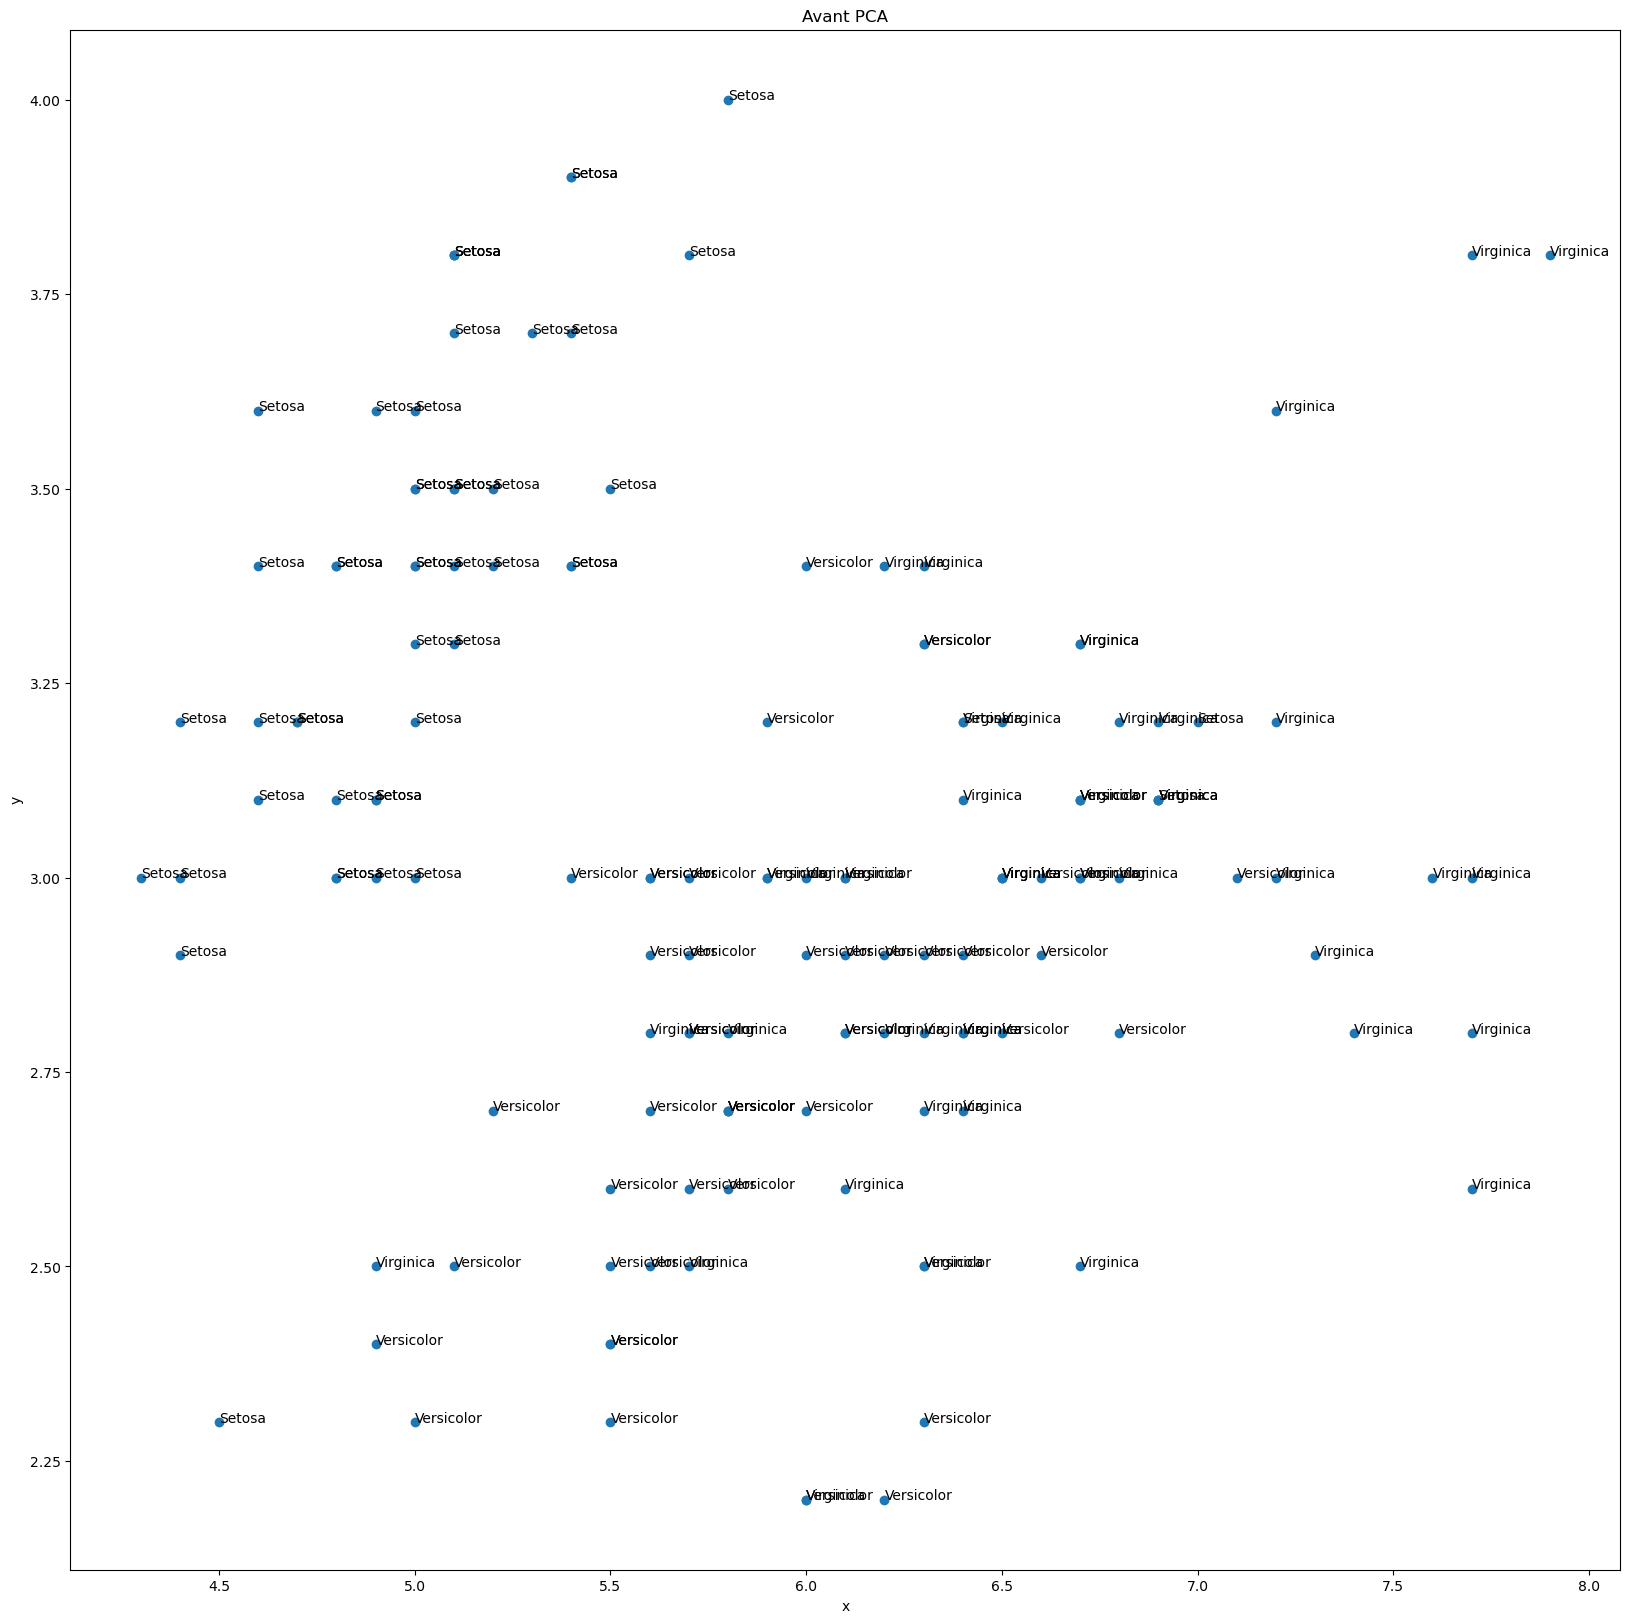

In [150]:
fig = plt.figure(figsize = (20,20))
plt.scatter(X[:,0],X[:,1])
plt.title('Avant PCA')
for label,x,y in zip(labels, X[:,0],X[:,1]):
    plt.annotate(label,xy=(x,y))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

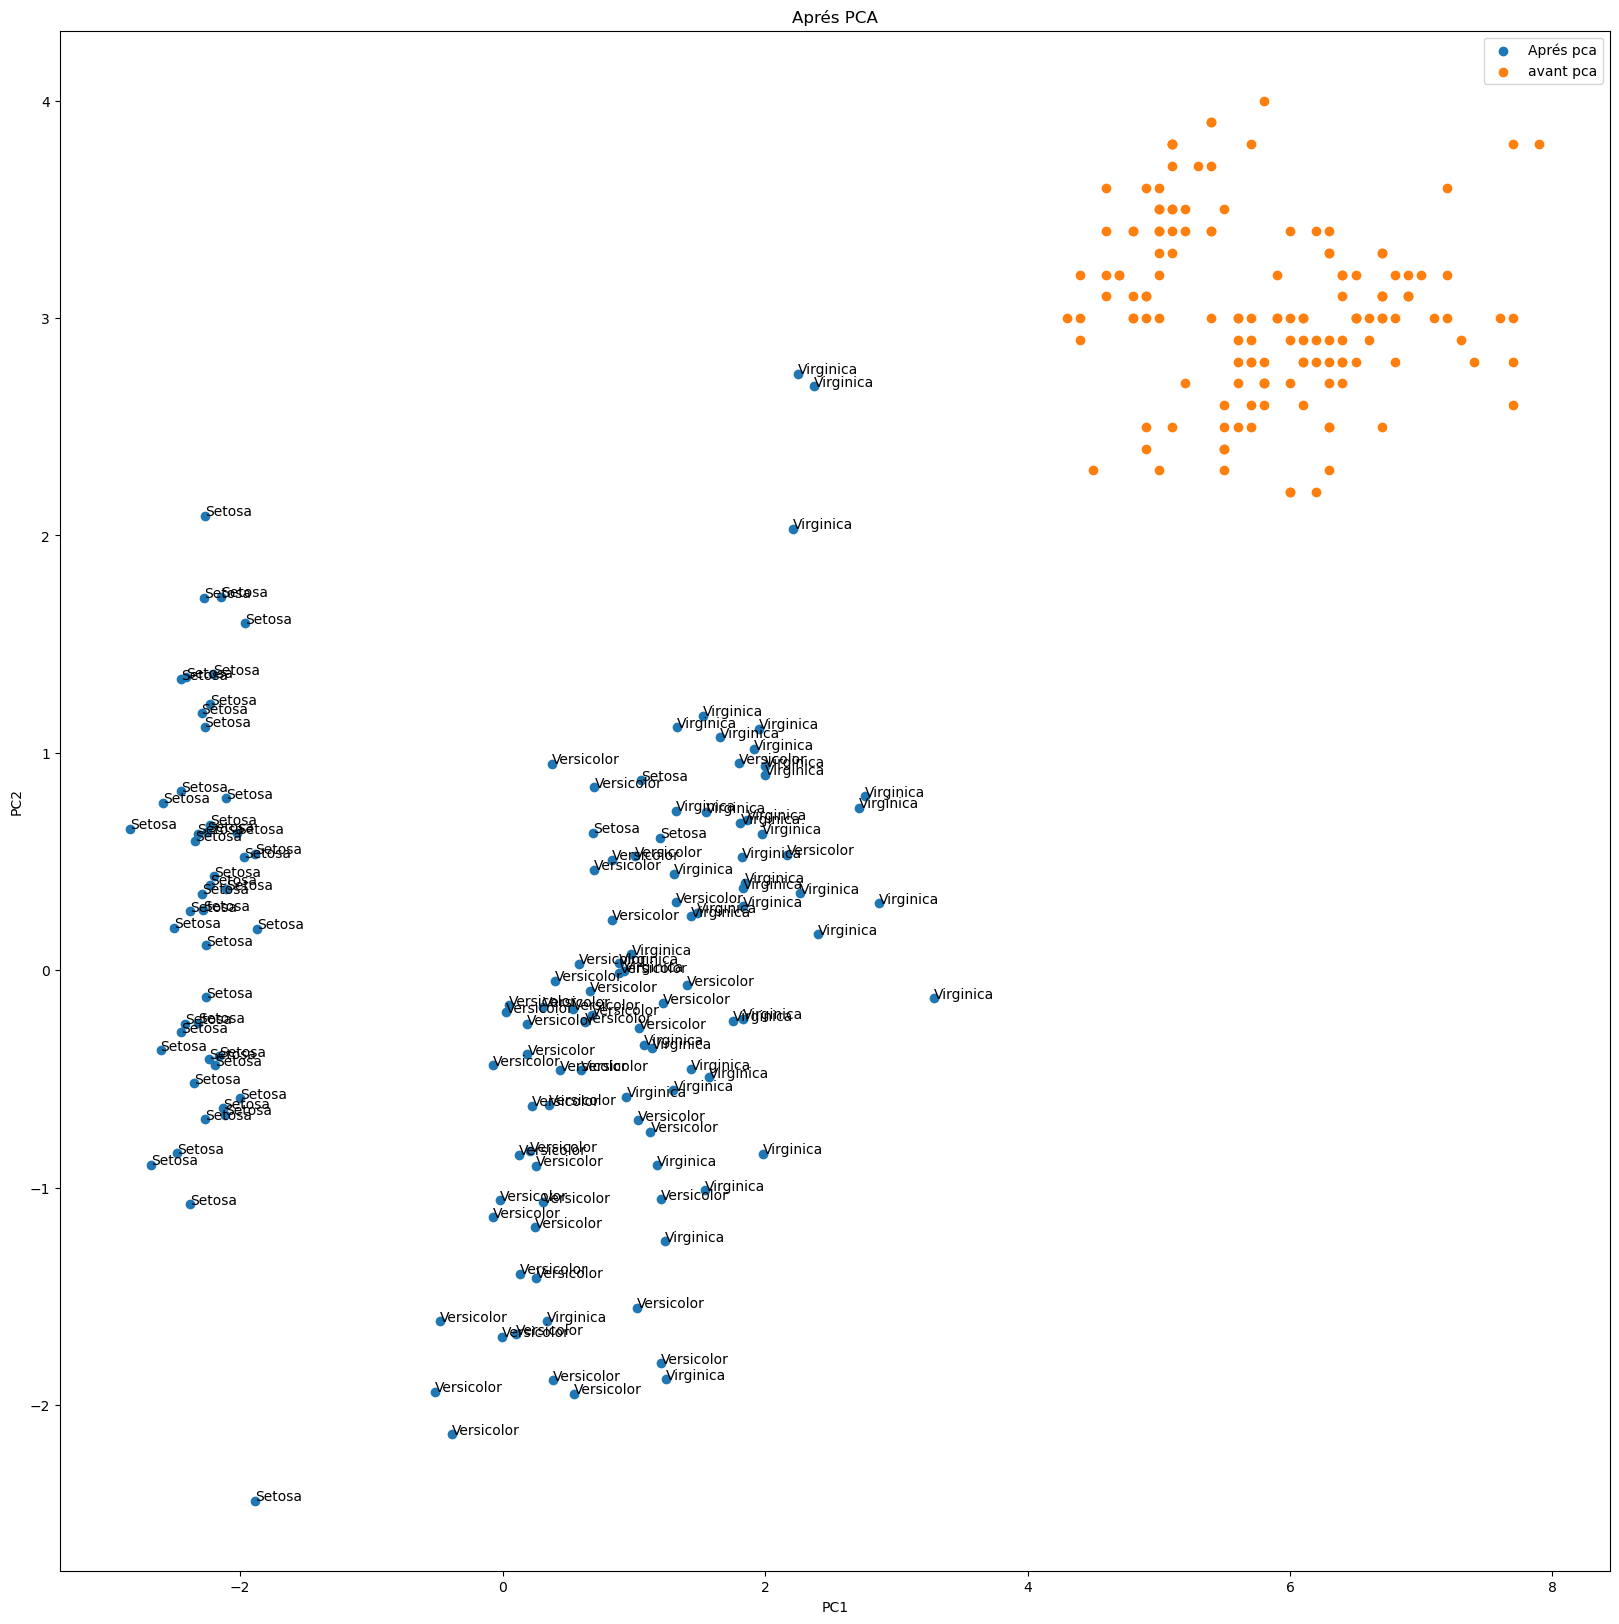

In [151]:
plt.figure(figsize=(20,20))
plt.title('Aprés PCA')
plt.scatter(X_pca[:,0],X_pca[:,1])
plt.scatter(X[:,0],X[:,1])
for label,x,y in zip(labels, X_pca[:,0],X_pca[:,1]):
    plt.annotate(label,xy=(x,y))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(['Aprés pca','avant pca'])

In [152]:
varname=['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

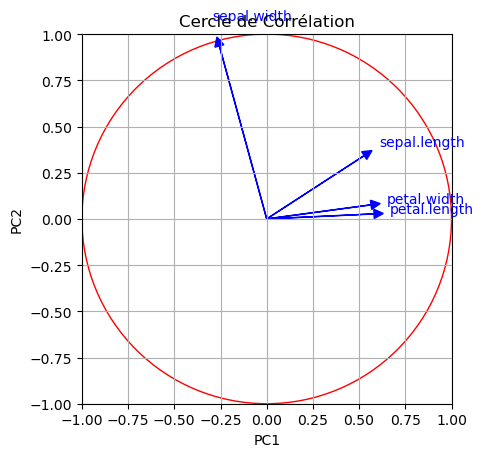

In [153]:
#Cerlce de correlation 
# Obtenir les vecteurs propres (composantes principales) et les valeurs propres
eigenvectors = pca.components_
eigenvalues = pca.explained_variance_ratio_

# Créer un cercle de corrélation
fig, ax = plt.subplots()
ax.set_aspect('equal')

# Tracer le cercle unitaire
circle = plt.Circle((0, 0), 1, fill=False, color='r')
ax.add_artist(circle)

# Tracer les vecteurs des variables d'origine sur le cercle
for i in range(4):
    ax.arrow(0, 0, eigenvectors[0, i], eigenvectors[1, i], head_width=0.05, head_length=0.05, fc='b', ec='b')
    ax.text(eigenvectors[0, i] * 1.15, eigenvectors[1, i] * 1.15, varname[i], color='b')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Cercle de Corrélation')

plt.grid()
plt.show()


On remarque que les variables 'pepal.width', 'petal.length',  sont fortement corréleés et on peut les considérer commen une seule variable! 

# K-means (clustring)

In [154]:
from sklearn.cluster import KMeans

In [155]:
#on prend K=5 et ça c'est arbitraire aprés on va detérminer le "K" Optimale 
kmeans = KMeans(5)
kmeans.fit(X_pca)
y_kmeans=kmeans.labels_

C:\Users\21624\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


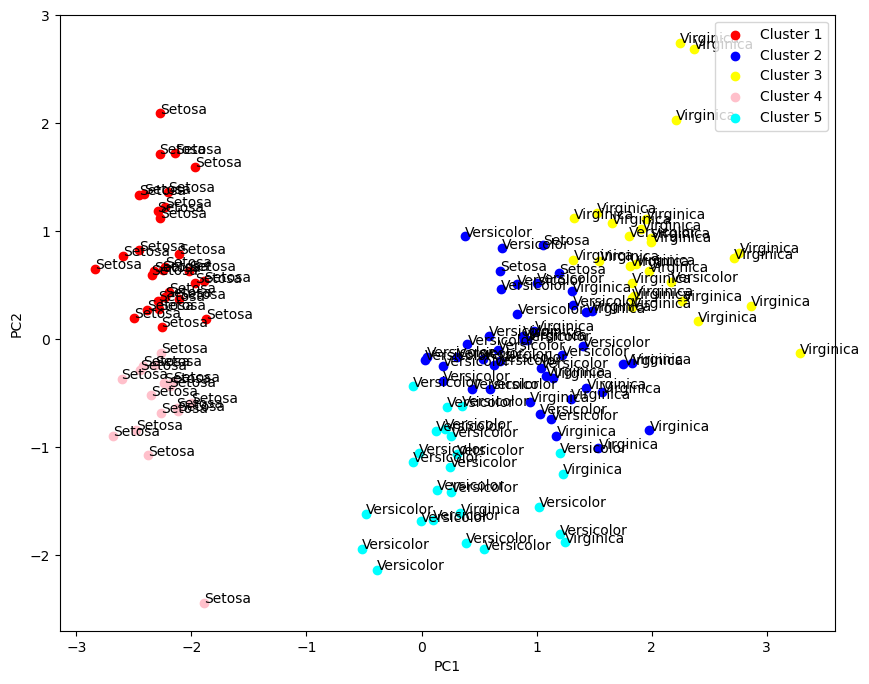

In [156]:
#Visualizing the clusters
plt.figure(figsize=(10,8))
plt.scatter(X_pca[y_kmeans==0,0],X_pca[y_kmeans==0,1],c='red',label = 'Cluster 1')
plt.scatter(X_pca[y_kmeans==1,0],X_pca[y_kmeans==1,1],c='blue',label = 'Cluster 2')
plt.scatter(X_pca[y_kmeans==2,0],X_pca[y_kmeans==2,1],c='yellow',label = 'Cluster 3')
plt.scatter(X_pca[y_kmeans==3,0],X_pca[y_kmeans==3,1],c='pink',label = 'Cluster 4')
plt.scatter(X_pca[y_kmeans==4,0],X_pca[y_kmeans==4,1],c='cyan',label = 'Cluster 5')
for label,x,y in zip(labels, X_pca[:,0],X_pca[:,1]):
    plt.annotate(label,xy=(x,y))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

In [157]:
##### within cluster sum of squares
wcss = []
for k in range(1,11):
    kmeans =KMeans(n_clusters=k, n_init=10) 
    kmeans.fit(X_pca)
    kmeans.inertia_
    wcss.append(kmeans.inertia_)

### Choisir la valeur optimale de K

Text(0.5, 1.0, 'Methode Elbow')

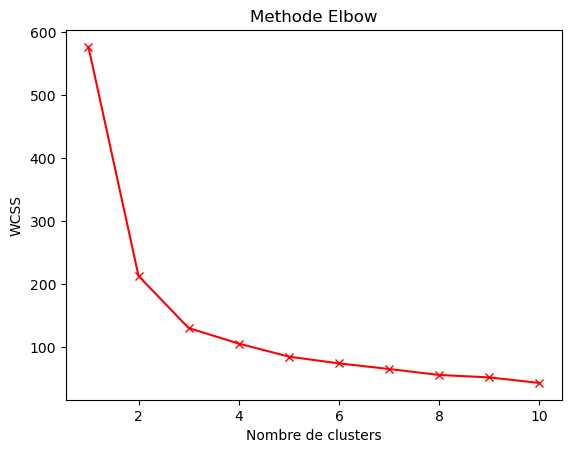

In [158]:
plt.plot(range(1,11),wcss, 'rx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.title('Methode Elbow')

In [159]:
from kneed import KneeLocator
k = KneeLocator(range(1,11),wcss,curve='convex',direction ='decreasing')
k.elbow

3

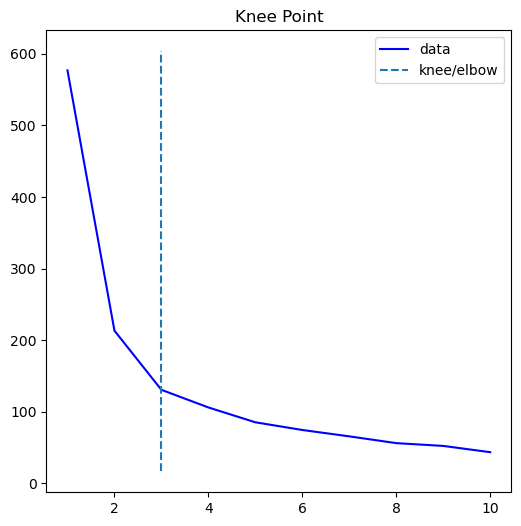

In [160]:
k.plot_knee()

In [161]:
#on prend K=3 maintenant puisque la valeur optimale de K 
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state =0)
kmeans.fit(X_pca)
y_kmeans = kmeans.labels_
y_kmeans

C:\Users\21624\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0])

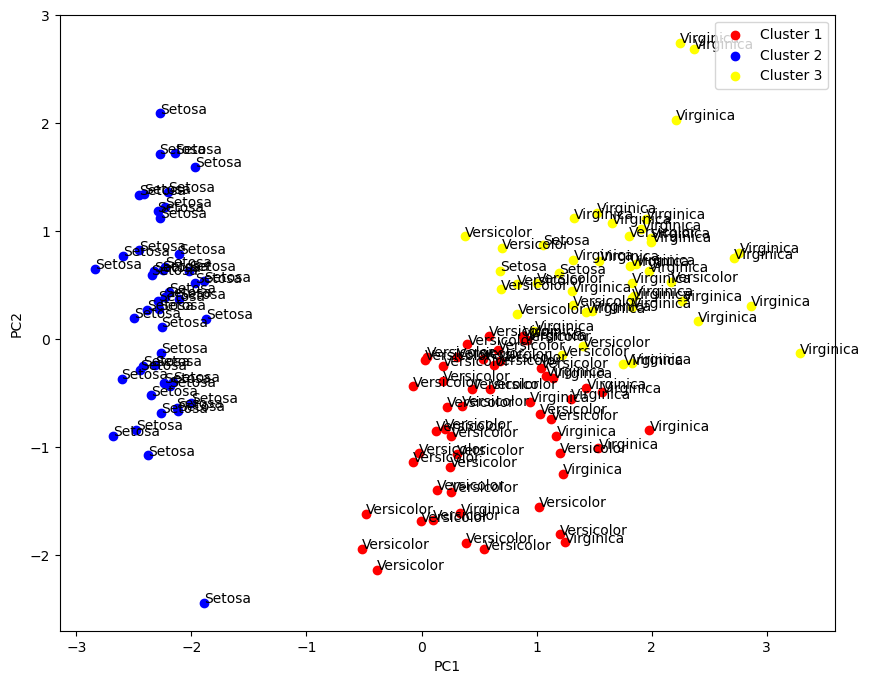

In [162]:
#Visualizing the clusters
plt.figure(figsize=(10,8))
plt.scatter(X_pca[y_kmeans==0,0],X_pca[y_kmeans==0,1],c='red',label = 'Cluster 1')
plt.scatter(X_pca[y_kmeans==1,0],X_pca[y_kmeans==1,1],c='blue',label = 'Cluster 2')
plt.scatter(X_pca[y_kmeans==2,0],X_pca[y_kmeans==2,1],c='yellow',label = 'Cluster 3')
for label,x,y in zip(labels, X_pca[:,0],X_pca[:,1]):
    plt.annotate(label,xy=(x,y))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

Faire un comparaison entre la résultat aplliquée par le clustring sur les données normalisées et le données provenat du PCA

In [163]:
kmeans2 = KMeans(n_clusters = 4, init = 'k-means++', random_state =0)
kmeans2.fit(X_scaler)
y_kmeans2 = kmeans2.labels_
y_kmeans2

C:\Users\21624\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 2, 3, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 3, 2, 3, 2, 3, 3, 0, 3, 2, 3, 3, 2, 3, 2,
       2, 3, 2, 3, 3, 0, 3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3,
       3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2])

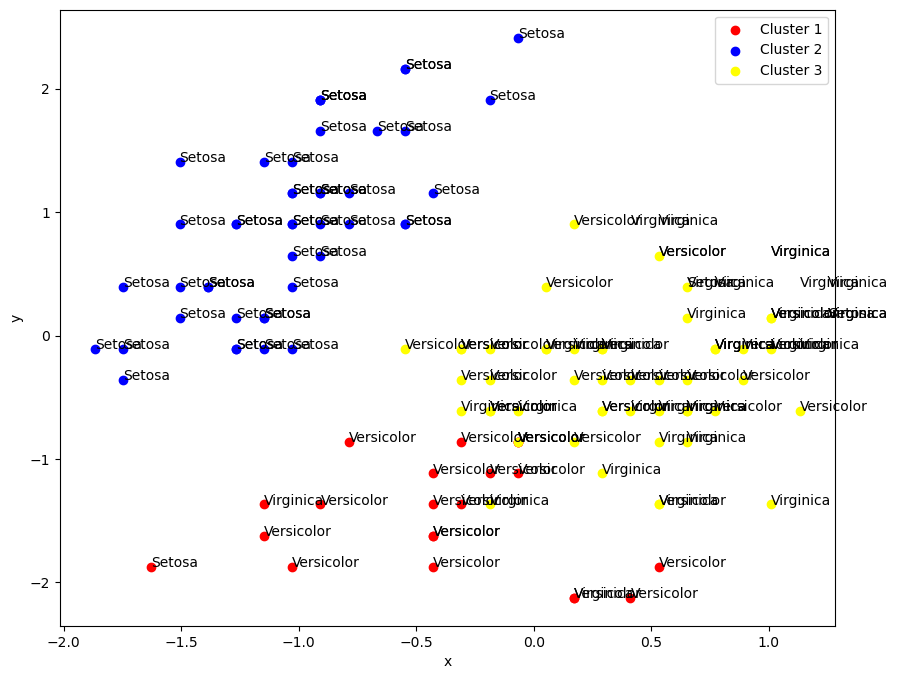

In [164]:
#Visualizing the clusters
plt.figure(figsize=(10,8))
plt.scatter(X_scaler[y_kmeans2==0,0],X_scaler[y_kmeans2==0,1],c='red',label = 'Cluster 1')
plt.scatter(X_scaler[y_kmeans2==1,0],X_scaler[y_kmeans2==1,1],c='blue',label = 'Cluster 2')
plt.scatter(X_scaler[y_kmeans2==2,0],X_scaler[y_kmeans2==2,1],c='yellow',label = 'Cluster 3')
for label,x,y in zip(labels, X_scaler[:,0],X_scaler[:,1]):
    plt.annotate(label,xy=(x,y))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [165]:
sum(y_kmeans != y_kmeans2)

63

In [166]:
##### within cluster sum of squares
wcss1 = []
for k in range(1,11):
    kmeans =KMeans(n_clusters=k, n_init=10) 
    kmeans.fit(X_scaler)
    kmeans.inertia_
    wcss1.append(kmeans.inertia_)

In [167]:
from kneed import KneeLocator
k1 = KneeLocator(range(1,11),wcss1,curve='convex',direction ='decreasing')
k1.elbow

3

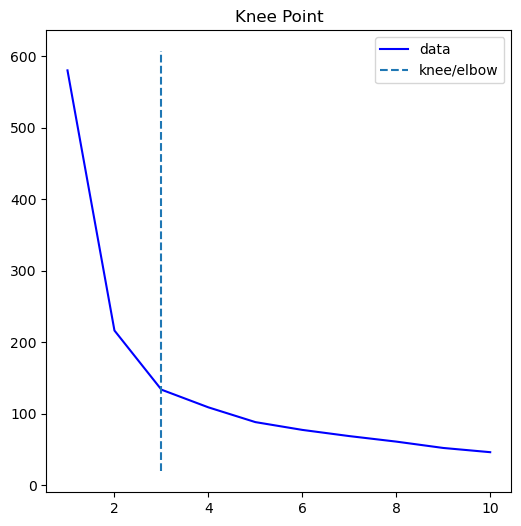

In [168]:
k1.plot_knee()

Notre choix alors dés le début était correcte !

In [169]:
cluster =KMeans(3,random_state=0)
cluster.fit(X_pca)
cluster_labels =cluster.labels_

C:\Users\21624\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [170]:
df_cluster =df2 
df_cluster['Cluster']=cluster_labels
df_cluster

,sepal.length,sepal.width,petal.length,petal.width,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [171]:
#X of features
X = df_cluster.drop(['Cluster'],axis=1)

#Exited as target 
y = df_cluster.Cluster

#### Ensembles training et test
Pour évaluer les performances du modèle sur des données invisibles, on divise les données en  training and testing sets. On  entraine  le  modèlele ici avec   80% d'exemples et le test avec   20% du reste. On utilise  'train_test_split function'de scikit-learn library. Choisir 'random_state', pour obtenir le même partage à chaque fois afin de pouvoir reproduire les résultats.
Enfin, on affiche les tailles de training and test sets pour voir si notre division est correcte

In [172]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

we set random state to get same result every time we run the same model. RS ensues that the results after running the same model are the same 

**Features scaling**
Scaling guarantees that all features are on a comparable scale and have comparable ranges.
 
* Standarisation or normalisation  : StandardScaler
$x \rightarrow (x-x_{mean})/std$

  

In [173]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

scaler=StandardScaler()

In [174]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# Métriques de Classification

Les métriques de classification sont utilisées pour évaluer la performance d'un modèle de classification. Les métriques les plus couramment utilisées comprennent :

## Matrice de Confusion

Une matrice de confusion permet de visualiser les performances d'un modèle de classification. Elle contient quatre valeurs :

- <span style="color: green">**Vrais Positifs (TP)**</span> : Le nombre d'observations positives correctement classées comme positives.
- <span style="color: green">**Vrais Négatifs (TN)**</span> : Le nombre d'observations négatives correctement classées comme négatives.
- <span style="color: red">**Faux Positifs (FP)**</span> : Le nombre d'observations négatives classées à tort comme positives (erreur de type I).
- <span style="color: red">**Faux Négatifs (FN)**</span> : Le nombre d'observations positives classées à tort comme négatives (erreur de type II).

## Précision

La précision mesure la proportion d'observations positives correctement classées parmi toutes les observations positives prédites par le modèle.

Formule : Précision = TP / (TP + FP)

## Rappel

Le rappel mesure la proportion d'observations positives correctement classées parmi toutes les observations réellement positives.

Formule : Rappel = TP / (TP + FN)

## Score F1

Le score F1 est une métrique qui combine à la fois la précision et le rappel en une seule mesure.

Formule : F1 Score = 2 * (Précision * Rappel) / (Précision + Rappel)

## Exactitude

L'exactitude mesure la proportion d'observations correctement classées parmi toutes les observations.

Formule : Exactitude = (TP + TN) / (TP + TN + FP + FN)

Ces métriques sont essentielles pour évaluer la performance d'un modèle de classification dans différents contextes. Le choix de la métrique dépend des objectifs du projet et des conséquences associées aux erreurs de classification.


In [175]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
recall_score, precision_score, f1_score

Dans ce mini-projet nous utliserons 3 Types de modélisations :
* Decision Tree
* Random Forest
* K-Nearest Neighbors (KNN)

###  Decision Tree

* Les arbres de décision sont utilisés pour la classification et la régression.
* Ils modélisent la relation entre les caractéristiques et la cible sous forme d'arbre.
* Ils sont faciles à interpréter et peuvent gérer des données mixtes (catégorielles et numériques).

In [176]:
from sklearn.tree import DecisionTreeClassifier

In [177]:
#appliquer dt 
dt=DecisionTreeClassifier()
dt.fit(X_train_sc,y_train)
print(dt.score(X_train_sc,y_train))
print(dt.score(X_test_sc,y_test))

1.0
0.9655172413793104


In [178]:
y_pred_dt_train =dt.predict(X_train_sc)
y_pred_dt_test = dt.predict(X_test_sc)

In [179]:
#Calculer les 4 metriques sur ensemble train

In [180]:
confu_matrix_dt_train=confusion_matrix(y_train, y_pred_dt_train)
f1_dt_train = f1_score(y_train, y_pred_dt_train,average=None)
accu_dt_train=accuracy_score(y_train, y_pred_dt_train)
re_dt_train=recall_score(y_train, y_pred_dt_train,average=None)
preci_dt_train=precision_score(y_train, y_pred_dt_train,average=None)

In [181]:
print(f'Confusion Matrix = {confu_matrix_dt_train}')
print(f'f1_score = {f1_dt_train}')
print(f'acccuracy_score = {accu_dt_train}')
print(f'recall_score = {re_dt_train}')
print(f'precision_score = {preci_dt_train}')

Confusion Matrix = [[44  0  0]
 [ 0 36  0]
 [ 0  0 36]]
f1_score = [1. 1. 1.]
acccuracy_score = 1.0
recall_score = [1. 1. 1.]
precision_score = [1. 1. 1.]


In [182]:
# Calculer les 4 metriques sur ensemble test

In [183]:
confu_matrix_dt_test=confusion_matrix(y_test, y_pred_dt_test)
f1_dt_test = f1_score(y_test, y_pred_dt_test,average=None)
accu_dt_test=accuracy_score(y_test, y_pred_dt_test)
re_dt_test=recall_score(y_test, y_pred_dt_test,average=None)
preci_dt_test=precision_score(y_test, y_pred_dt_test,average=None)

In [184]:
print(f'Confusion Matrix = {confu_matrix_dt_test}')
print(f'f1_score = {f1_dt_test}')
print(f'acccuracy_score = {accu_dt_test}')
print(f'recall_score = {re_dt_test}')
print(f'precision_score = {preci_dt_test}')

Confusion Matrix = [[ 9  0  0]
 [ 0 11  0]
 [ 1  0  8]]
f1_score = [0.94736842 1.         0.94117647]
acccuracy_score = 0.9655172413793104
recall_score = [1.         1.         0.88888889]
precision_score = [0.9 1.  1. ]


***Interpretation***
1. **Matrice de Confusion** :
   - La matrice de confusion montre que le modèle a correctement classé la grande majorité des échantillons de test pour les trois classes. Les nombres en diagonale (9, 11, 8) représentent le nombre d'observations correctement classées pour chaque classe. Il n'y a pas d'erreurs de classification entre ces classes.

2. **F1 Score** :
   - Le score F1 est une mesure qui combine à la fois la précision et le rappel en une seule valeur. Il indique à quel point le modèle est capable de trouver toutes les instances positives tout en minimisant les faux positifs.
   - Les valeurs du F1 Score pour chaque classe (0.947, 1.000, 0.941) sont relativement élevées, indiquant une bonne performance de classification.

3. **Exactitude (Accuracy)** :
   - L'exactitude mesure la proportion d'observations correctement classées parmi toutes les observations de l'ensemble de test.
   - Une exactitude de 0.966 (96.66%) indique que le modèle a correctement classé la grande majorité des échantillons de test, ce qui suggère une performance globale très bonne.

4. **Rappel (Recall)** :
   - Le rappel mesure la proportion d'observations positives correctement classées parmi toutes les observations réellement positives.
   - Les valeurs du rappel pour chaque classe (1.000, 1.000, 0.889) sont élevées, indiquant que le modèle est capable de trouver la grande majorité des vraies instances positives.

5. **Précision (Precision)** :
   - La précision mesure la proportion d'observations positives correctement classées parmi toutes les observations prédites comme positives.
   - Les valeurs de précision pour chaque classe (0.900, 1.000, 1.000) sont également élevées, ce qui signifie que lorsque le modèle prédit une classe comme positive, il a tendance à avoir raison.

Dans l'ensemble, ces résultats indiquent que le modèle a une très bonne performance sur l'ensemble de test. Il réussit à bien classer les observations pour les trois classes, avec des scores F1, de rappel et de précision élevés. L'exactitude globale de 96.66% montre que le modèle a une performance globale très satisfaisante. Cela suggère que le modèle est efficace pour la tâche de classification sur ces données de test.

In [185]:
feature_names= X.columns.to_list() #nom des features
print(feature_names)

['sepal.length', 'sepal.width', 'petal.length', 'petal.width']


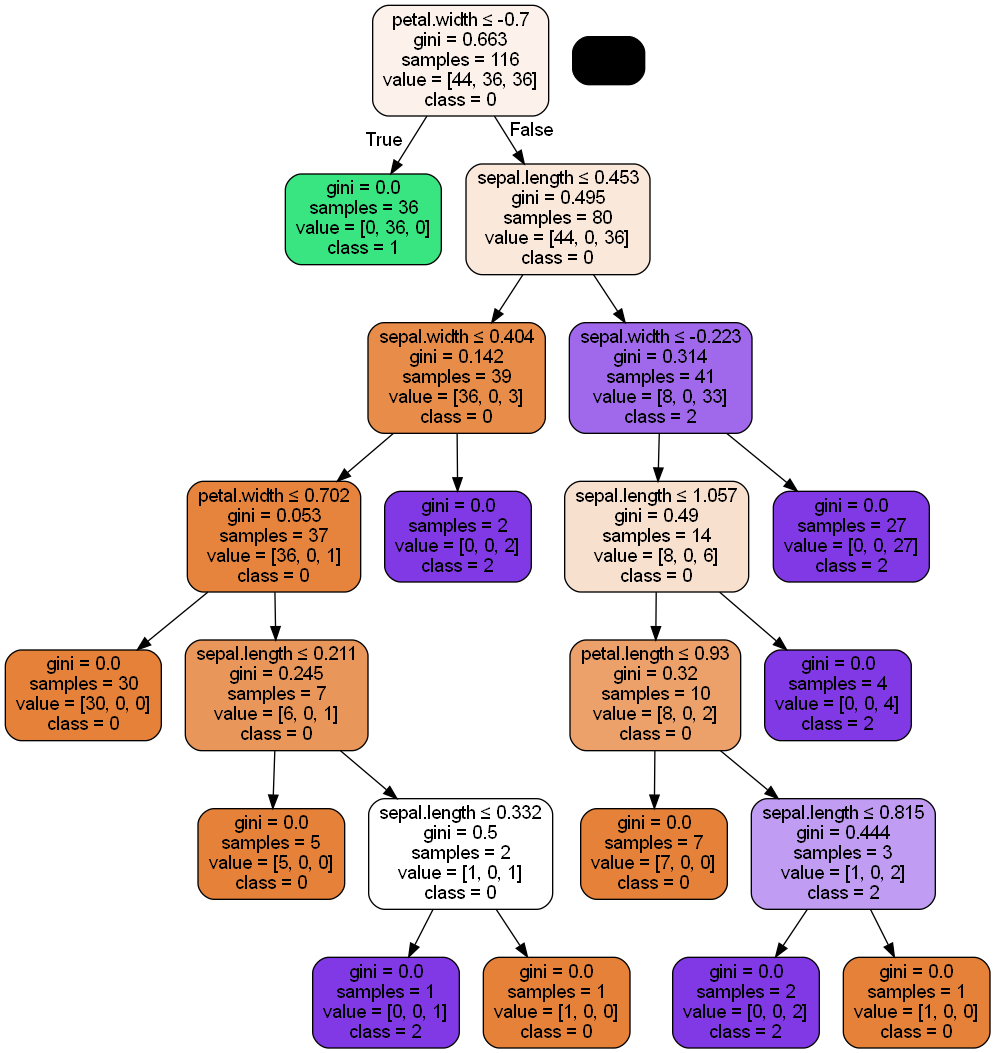

In [186]:
#Affichage de l'arbre
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=feature_names,  
                           class_names=list(map(str, dt.classes_)),  
                           filled=True, rounded=True, special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

###  Random Forest
**Le Random Forest est un algorithme d'apprentissage automatique qui appartient à la famille des méthodes d'ensemble (ensemble methods). Il est largement utilisé pour des tâches de classification et de régression, et il est apprécié pour sa puissance et sa capacité à gérer des ensembles de données complexes.**

**Le Random Forest est basé sur l'idée de combiner les prédictions de plusieurs arbres de décision. Chaque arbre de décision est construit indépendamment à partir de sous-ensembles aléatoires des données d'entraînement. Ces arbres sont ensuite agrégés pour former un modèle global**

In [187]:
from sklearn.ensemble import RandomForestClassifier

In [188]:
rf =RandomForestClassifier()
rf.fit(X_train_sc,y_train)
rf.score(X_train_sc,y_train)

1.0

In [189]:
y_pred_rf_train =rf.predict(X_train_sc)
y_pred_rf_test =rf.predict(X_test_sc)

In [190]:
# Calculer les 4 metriques sur ensemble train

In [191]:
confu_matrix_rf_train=confusion_matrix(y_train, y_pred_rf_train)
f1_rf_train = f1_score(y_train, y_pred_rf_train,average=None)
accu_rf_train=accuracy_score(y_train, y_pred_rf_train)
re_rf_train=recall_score(y_train, y_pred_rf_train,average=None)
preci_rf_train=precision_score(y_train, y_pred_rf_train,average=None)

In [192]:
print(f'Confusion Matrix = {confu_matrix_rf_train}')
print(f'f1_score = {f1_rf_train}')
print(f'acccuracy_score = {accu_rf_train}')
print(f'recall_score = {re_rf_train}')
print(f'precision_score = {preci_rf_train}')

Confusion Matrix = [[44  0  0]
 [ 0 36  0]
 [ 0  0 36]]
f1_score = [1. 1. 1.]
acccuracy_score = 1.0
recall_score = [1. 1. 1.]
precision_score = [1. 1. 1.]


In [193]:
# Calculer les 4 metriques sur ensemble test

In [194]:
confu_matrix_rf_test=confusion_matrix(y_test, y_pred_rf_test)
f1_rf_test = f1_score(y_test, y_pred_rf_test,average=None)
accu_rf_test=accuracy_score(y_test, y_pred_rf_test)
re_rf_test=recall_score(y_test, y_pred_rf_test,average=None)
preci_rf_test=precision_score(y_test, y_pred_rf_test,average=None)

In [195]:
print(f'Confusion Matrix = {confu_matrix_rf_test}')
print(f'f1_score = {f1_rf_test}')
print(f'acccuracy_score = {accu_rf_test}')
print(f'recall_score = {re_rf_test}')
print(f'precision_score = {preci_rf_test}')

Confusion Matrix = [[ 9  0  0]
 [ 0 11  0]
 [ 1  0  8]]
f1_score = [0.94736842 1.         0.94117647]
acccuracy_score = 0.9655172413793104
recall_score = [1.         1.         0.88888889]
precision_score = [0.9 1.  1. ]


***Interpretation***
1. **Matrice de Confusion** :
   - La matrice de confusion montre comment le modèle Random Forest a classé les échantillons pour trois classes différentes. Elle indique le nombre d'observations correctement classées (sur la diagonale) et les erreurs de classification (en dehors de la diagonale).
   - Dans votre cas, le modèle a correctement classé la grande majorité des échantillons pour les trois classes, avec seulement une erreur de classification dans la classe 3.

2. **Score F1** :
   - Le score F1 est une métrique qui combine la précision et le rappel en une seule valeur. Il mesure la capacité du modèle à trouver toutes les instances positives tout en minimisant les faux positifs.
   - Les valeurs de F1 Score pour chaque classe (0.947, 1.000, 0.941) sont généralement élevées, indiquant une bonne capacité de classification du modèle pour ces classes.

3. **Exactitude (Accuracy)** :
   - L'exactitude mesure la proportion d'observations correctement classées parmi toutes les observations de l'ensemble de test.
   - Une exactitude de 0.966 (96.6%) indique que le modèle a correctement classé la grande majorité des échantillons de test, ce qui suggère une performance globale très bonne.

4. **Rappel (Recall)** :
   - Le rappel mesure la proportion d'observations positives correctement classées parmi toutes les observations réellement positives.
   - Les valeurs de rappel pour chaque classe (1.000, 1.000, 0.889) indiquent que le modèle est capable de trouver la grande majorité des vraies instances positives, bien que le rappel pour la classe 3 soit légèrement plus bas.

5. **Précision (Precision)** :
   - La précision mesure la proportion d'observations positives correctement classées parmi toutes les observations prédites comme positives.
   - Les valeurs de précision pour chaque classe (0.900, 1.000, 1.000) montrent que lorsque le modèle prédit une classe comme positive, il a tendance à avoir raison.

Dans l'ensemble, ces résultats suggèrent que le modèle Random Forest a une performance globale très satisfaisante sur l'ensemble de test. Il réussit à bien classer les observations pour les trois classes, avec des scores F1, de rappel et de précision élevés, et une exactitude globale de 96.6%. Cela suggère que le modèle est efficace pour la tâche de classification sur ces données de test.

### K-Nearest Neighbors (KNN)

In [196]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

Nous allons utiliser la méthode de "Cross Validation" pour déterminer le K optimale

In [197]:
# Initialisez une liste pour stocker les scores de validation croisée
cross_val_scores = []
k_values=[i for i in range(1,11)]
# Boucle sur les valeurs de k
for k in range(1,11):
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, X, y, cv=10) # Utilisez la validation croisée avec 10 plis
    cross_val_scores.append(scores.mean())

# Trouvez la meilleure valeur de k en fonction des scores
best_k = k_values[cross_val_scores.index(max(cross_val_scores))]
print("Meilleur k : ", best_k)

Meilleur k :  7


In [198]:
#Appliquer le modèle knn
knn =KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_sc,y_train)
print(knn.score(X_train_sc,y_train))
print(knn.score(X_test_sc,y_test))

0.9913793103448276
1.0


In [199]:
y_pred_knn_train =knn.predict(X_train_sc)
y_pred_knn_test =knn.predict(X_test_sc)

In [200]:
# Calculer les 4 metriques sur ensemble train

In [201]:
confu_matrix_knn_train=confusion_matrix(y_train, y_pred_knn_train)
f1_knn_train = f1_score(y_train, y_pred_knn_train,average=None)
accu_knn_train=accuracy_score(y_train, y_pred_knn_train)
re_knn_train=recall_score(y_train, y_pred_knn_train,average=None)
preci_knn_train=precision_score(y_train, y_pred_knn_train,average=None)

In [202]:
print(f'Confusion Matrix = {confu_matrix_knn_train}')
print(f'f1_score = {f1_knn_train}')
print(f'acccuracy_score = {accu_knn_train}')
print(f'recall_score = {re_knn_train}')
print(f'precision_score = {preci_knn_train}')

Confusion Matrix = [[44  0  0]
 [ 0 36  0]
 [ 1  0 35]]
f1_score = [0.98876404 1.         0.98591549]
acccuracy_score = 0.9913793103448276
recall_score = [1.         1.         0.97222222]
precision_score = [0.97777778 1.         1.        ]


In [203]:
# Calculer les 4 metriques sur ensemble test

In [204]:
confu_matrix_knn_test=confusion_matrix(y_test, y_pred_knn_test)
f1_knn_test = f1_score(y_test, y_pred_knn_test,average=None)
accu_knn_test=accuracy_score(y_test, y_pred_knn_test)
re_knn_test=recall_score(y_test, y_pred_knn_test,average=None)
preci_knn_test=precision_score(y_test, y_pred_knn_test,average=None)

In [205]:
print(f'Confusion Matrix = {confu_matrix_knn_test}')
print(f'f1_score = {f1_knn_test}')
print(f'acccuracy_score = {accu_knn_test}')
print(f'recall_score = {re_knn_test}')
print(f'precision_score = {preci_knn_test}')

Confusion Matrix = [[ 9  0  0]
 [ 0 11  0]
 [ 0  0  9]]
f1_score = [1. 1. 1.]
acccuracy_score = 1.0
recall_score = [1. 1. 1.]
precision_score = [1. 1. 1.]


## Sélection des variables
## Lasso

La méthode Lasso (Least Absolute Shrinkage and Selection Operator) est une technique de régularisation largement utilisée en régression linéaire et en apprentissage automatique. Elle est conçue pour sélectionner les caractéristiques les plus importantes et réduire la complexité des modèles tout en évitant le surajustement :

1. **Objectif de la régularisation Lasso** :

   L'objectif principal de la régularisation Lasso est de pénaliser les coefficients des caractéristiques moins importantes en les forçant à devenir exactement zéro. En d'autres termes, elle effectue à la fois de la sélection de caractéristiques et de la régularisation. Cela signifie que seules les caractéristiques les plus pertinentes seront conservées dans le modèle, tandis que les autres seront éliminées.

2. **Fonction de coût Lasso** :

   La fonction de coût de la régression Lasso est une combinaison de la fonction de perte des moindres carrés ordinaires (qui mesure l'ajustement aux données) et d'un terme de régularisation L1. La fonction de coût de la régression Lasso est définie comme suit :

   **Fonction de coût Lasso** = **MSE (Erreur quadratique moyenne)** + **α * Σ|β_i|**

   - MSE mesure l'écart entre les prédictions du modèle et les valeurs réelles.
   - α (alpha) est le paramètre de régularisation, qui contrôle la force de la régularisation. Plus α est grand, plus la pénalité est forte.
   - β_i représente les coefficients des caractéristiques.

3. **Effet de la régularisation L1** :

   La régularisation L1 (la somme des valeurs absolues des coefficients) favorise la simplicité du modèle en poussant un grand nombre de coefficients vers zéro. Cela signifie que la régularisation Lasso peut éliminer complètement certaines caractéristiques du modèle en les mettant à zéro.

4. **Choix de α** :

   Le choix de la valeur de α est crucial. Si α est trop élevé, il peut conduire à la suppression de trop de caractéristiques, ce qui réduirait la capacité prédictive du modèle. Si α est trop faible, la régularisation Lasso n'aura pas beaucoup d'impact, et le modèle pourrait souffrir de surajustement. Le réglage de α est souvent fait par validation croisée pour trouver la meilleure valeur.

5. **Applications de la régularisation Lasso** :

   La régularisation Lasso est couramment utilisée dans des domaines tels que l'analyse de données, l'apprentissage automatique, la régression linéaire, et la régression logistique. Elle est particulièrement utile lorsque vous avez un grand nombre de caractéristiques et que vous souhaitez identifier les caractéristiques les plus importantes.

En résumé, la méthode Lasso est une technique de régularisation puissante pour la sélection de caractéristiques et la réduction de la complexité des modèles, en forçant de nombreux coefficients à zéro. Elle est largement utilisée pour améliorer la généralisation des modèles d'apprentissage automatique.

In [206]:
# Créer un modèle de régression Lasso avec alpha (paramètre de régularisation)
lasso = Lasso(alpha=0.02)

# Adapter le modèle aux données
lasso.fit(X, y)

# Obtenir les coefficients (importances) de chaque caractéristique
feature_importances = lasso.coef_

# Sélectionner les caractéristiques avec des coefficients non nuls
selected_feature_names = [feature_names[i] for i, coef in enumerate(feature_importances) if coef != 0]

# Afficher les noms des caractéristiques sélectionnées
print("Noms des caractéristiques sélectionnées:")
print(selected_feature_names)


Noms des caractéristiques sélectionnées:
['sepal.length', 'sepal.width', 'petal.width']


## Rigide

La méthode de régression Ridge, également connue sous le nom de régression L2, est une technique de régression linéaire régularisée couramment utilisée en apprentissage automatique et en statistiques. Elle est similaire à la régression linéaire ordinaire, mais elle inclut une pénalisation qui vise à réduire la complexité du modèle en contrôlant la magnitude des coefficients des caractéristiques :

1. **Objectif de la régularisation Ridge** :

   L'objectif principal de la régularisation Ridge est de minimiser la somme des carrés des résidus (comme dans la régression linéaire ordinaire) tout en ajoutant une pénalité pour maintenir les coefficients des caractéristiques petits. Cela permet de réduire la sensibilité du modèle aux variations mineures dans les données d'entraînement et de réduire le risque de surajustement (overfitting).

2. **Fonction de coût de la régression Ridge** :

   La fonction de coût de la régression Ridge est une combinaison de deux termes :
   
   - La fonction de perte des moindres carrés ordinaires (MSE, Mean Squared Error), qui mesure l'ajustement du modèle aux données.
   - Un terme de régularisation L2, qui est la somme des carrés des coefficients pondérée par un hyperparamètre α (alpha). La fonction de coût de la régression Ridge est définie comme suit :

   **Fonction de coût Ridge** = **MSE (Erreur quadratique moyenne)** + **α * Σ(β_i^2)**

   - MSE mesure l'écart entre les prédictions du modèle et les valeurs réelles.
   - α (alpha) est le paramètre de régularisation, qui contrôle la force de la régularisation. Plus α est grand, plus la pénalité est forte.
   - β_i représente les coefficients des caractéristiques.

3. **Effet de la régularisation L2** :

   La régularisation L2 (Ridge) favorise des coefficients de caractéristiques plus petits, mais elle ne pousse pas les coefficients jusqu'à zéro. Cela signifie que toutes les caractéristiques sont conservées dans le modèle, mais elles contribuent de manière atténuée aux prédictions.

4. **Choix de α** :

   Le choix de la valeur de α est crucial. Une valeur plus élevée de α conduit à une régularisation plus forte, ce qui réduit les coefficients des caractéristiques. Le réglage de α est souvent fait par validation croisée pour trouver la meilleure valeur.

5. **Applications de la régression Ridge** :

   La régression Ridge est utilisée dans une variété de domaines, notamment la modélisation statistique, l'apprentissage automatique, la science des données et l'analyse prédictive. Elle est particulièrement utile lorsque vous avez un grand nombre de caractéristiques et que vous souhaitez réduire le risque de surajustement.

En résumé, la méthode de régression Ridge est une technique de régression régularisée qui permet de contrôler la complexité du modèle en pénalisant les coefficients des caractéristiques, tout en maintenant toutes les caractéristiques dans le modèle. Elle est couramment utilisée pour améliorer la généralisation des modèles de régression.

Tout d'abord nous allons chercher la alpha optimale en utilisons mar exemple la méthode de GridSearch

In [207]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Créer un modèle de régression Ridge
ridge = Ridge()

# Définir la gamme de valeurs d'alpha à tester
param_grid = {'alpha': [0.001,0.002, 0.01,0.02, 0.1,0.2, 1.0,2.0, 10.0,20.0]}

# Créer un objet GridSearchCV pour effectuer la recherche d'hyperparamètre
grid_search = GridSearchCV(ridge, param_grid, cv=10, scoring='neg_mean_squared_error')

# Exécuter la recherche d'hyperparamètre
grid_search.fit(X, y)

# Obtenir la meilleure valeur d'alpha trouvée
best_alpha = grid_search.best_params_['alpha']

# Entraîner un modèle Ridge avec la meilleure valeur d'alpha
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X, y)

# Afficher la meilleure valeur d'alpha et les performances associées
print(f"Meilleure valeur d'alpha : {best_alpha}")
print(f"Meilleur score (MSE) : {grid_search.best_score_:.2f}")

Meilleure valeur d'alpha : 0.2
Meilleur score (MSE) : -0.39


Aprés on effectue la Rigide

In [208]:
# Importation des bibliothèques nécessaires
from sklearn.linear_model import Ridge

# Créer un modèle de régression Ridge avec alpha (paramètre de régularisation)
ridge = Ridge(alpha=0.2)

# Adapter le modèle aux données
ridge.fit(X, y)

# Obtenir les coefficients de chaque caractéristique
feature_coefficients = ridge.coef_

# Sélectionner les caractéristiques avec des coefficients non nuls
selected_feature_names = [feature_names[i] for i, coef in enumerate(feature_coefficients) if coef != 0]

# Afficher les noms des caractéristiques sélectionnées
print("Noms des caractéristiques sélectionnées:")
print(selected_feature_names)

Noms des caractéristiques sélectionnées:
['sepal.length', 'sepal.width', 'petal.length', 'petal.width']


Les deux méthodes a fournit des résultats un peu différents , mais comme on déja effectuer une ACP qui nous permet de conclure en se basant sur la cercle de correlations que les deux variables 'petal.length'et 'petal.width' ont une forte correlations donc peut interpreter que la méthode de sélection e variables Lasso a fournit des résultats plus pertinents malgré qu'on cherché une alpha "optimale" dans la méthode Rigide